#### Processing Data of Beat AML data wave 3/4
#### Data were downloaded from the paper for Beat AML data wave 3/4 (doi: 10.1016/j.ccell.2022.07.002)


In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../src/')
import matrix_convert as mc

# Loading BeatAML wave1/4 dataset

In [4]:
Data_dir = "~/Documents/Datasets/AML/BeatAML-wave1-4/Beat AML collaborator files Waves 1-4/"
# read from xlsx file
BeatAML_mut_w14 = pd.read_excel(Data_dir +"mutations/beataml_wes_wv1to4_mutations_v4.xlsx")
# read tsv file
BeatAML_drug_response_w14= pd.read_csv(Data_dir + "inhibitor/beataml_probit_curve_fits_v4_distr_nonproprietary.txt", sep = "\t")
BeatAML_rnaseq_w14 = pd.read_csv(Data_dir + "rnaseq/beataml_waves1to4_allnorm.txt", sep = "\t")

# Select high frequently mutated genes 


In [5]:
BeatAML_mut_s = BeatAML_mut_w14.loc[:,['original_id','variant_classification',  'symbol','amino_acids','genotyper']]

#select variants from BeatAML_mut_s if the genotyper includes both mutect and varsan
BeatAML_mut_s['new_id'] = BeatAML_mut_s['symbol'] +':'+ BeatAML_mut_s['amino_acids']

print("The number of unique mutations in BeatAML_mut_s identified by either mutect or varscan: ")
print(len(BeatAML_mut_s['new_id'].unique()))
print("The number of unique mutations in BeatAML_mut_s identified by mutect: ")
print(len(BeatAML_mut_s.loc[BeatAML_mut_s['genotyper'] == 'mutect']['new_id'].unique()))
print("The number of unique mutations in BeatAML_mut_s identified by varscan: ")
print(len(BeatAML_mut_s.loc[BeatAML_mut_s['genotyper'] == 'varscan']['new_id'].unique()))
print("The number of unique mutations in BeatAML_mut_s identified by both mutect and varscan: ")
print(len(set(BeatAML_mut_s.loc[BeatAML_mut_s['genotyper'] == 'mutect']['new_id'].unique()).intersection(BeatAML_mut_s.loc[BeatAML_mut_s['genotyper'] == 'varscan']['new_id'].unique())))

The number of unique mutations in BeatAML_mut_s identified by either mutect or varscan: 
4909
The number of unique mutations in BeatAML_mut_s identified by mutect: 
3725
The number of unique mutations in BeatAML_mut_s identified by varscan: 
3981
The number of unique mutations in BeatAML_mut_s identified by both mutect and varscan: 
2797


In [6]:
# Convert gene mutation to a matrix
BeatAML_mut_matrix = mc.convert_df2matrix_bi(BeatAML_mut_s,"original_id","symbol")

# Select highly frequent mutated genes
selected_genes = []
for gene in BeatAML_mut_matrix.columns:
    if BeatAML_mut_matrix.loc[BeatAML_mut_matrix[gene] == 1].shape[0] >= 0.03*BeatAML_mut_matrix.shape[0]:
        selected_genes.append(gene)

selected_mutation_matrix = BeatAML_mut_matrix[selected_genes]
# Save the selected mutation matrix
#selected_mutation_matrix.to_csv("Feature_set1_mutation_matrix_w14.csv")

In [7]:
BeatAML_mut = BeatAML_mut_w14
w12 = set(BeatAML_mut.loc[BeatAML_mut['wave'] == "wave1+2"]['original_id'])
w34 = set(BeatAML_mut.loc[BeatAML_mut['wave'] == "wave3+4"]['original_id'])
print(len(w12))
print(len(w34))


603
268


In [8]:
BeatAML_mut_34 = BeatAML_mut.loc[BeatAML_mut['original_id'].isin(w34)]
print(BeatAML_mut_34.shape)
#BeatAML_mut_34

(1946, 33)


In [9]:
selected_mutation_matrix_34 = mc.convert_df2matrix_bi(BeatAML_mut_34,"original_id","symbol")

# Select highly frequent mutated genes
selected_genes = []
for gene in selected_mutation_matrix_34.columns:
    if selected_mutation_matrix_34.loc[selected_mutation_matrix_34[gene] == 1].shape[0] >= 0.03*selected_mutation_matrix_34.shape[0]:
        selected_genes.append(gene)

selected_mutation_matrix_34 = selected_mutation_matrix_34[selected_genes]
print(selected_mutation_matrix_34.shape)
# Save the selected mutation matrix


(268, 22)


In [10]:
selected_mutation_matrix_34

,FLT3,IDH2,KRAS,SRSF2,GATA2,BCOR,WT1,PDS5B,TET2,IDH1,...,DNMT3A,NRAS,NF1,SF3B1,ASXL1,NPM1,RUNX1,CEBPA,PTPN11,STAG2
13-00150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17-00187,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13-00092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17-00551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17-00319,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13-00075,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13-00147,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
19-00154,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
17-00748,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


(0.0, 30.0)

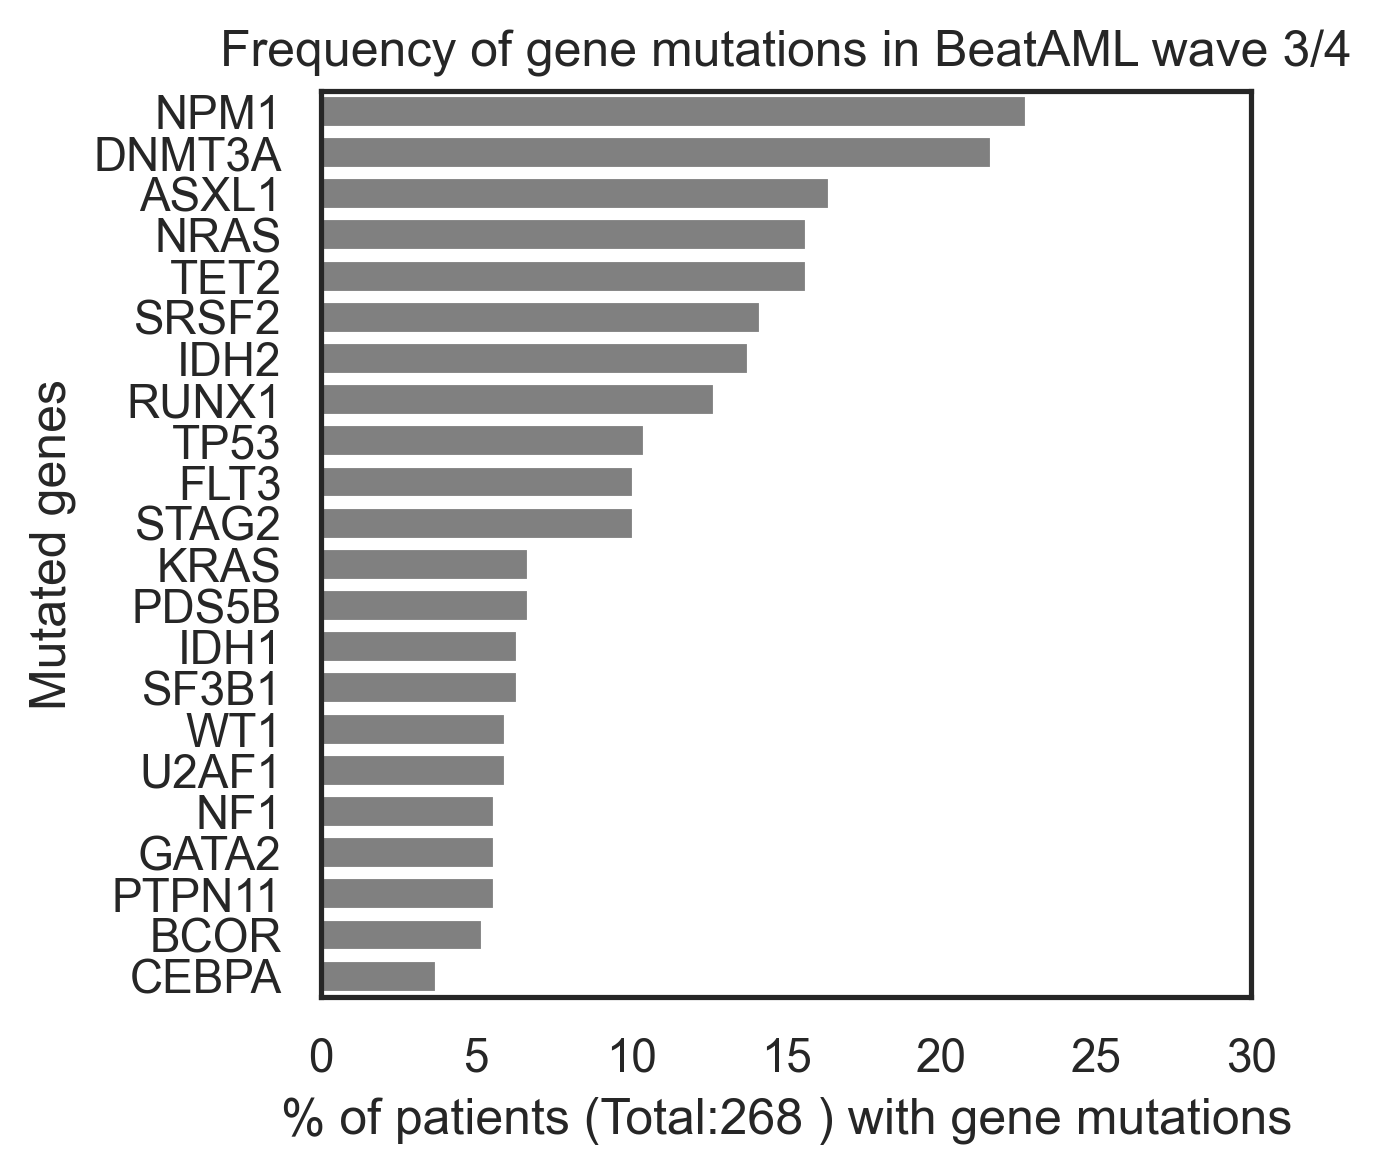

In [11]:
# Visualize the frequency of gene mutation
df_gene_mut_freq = selected_mutation_matrix_34.sum(axis = 0)/selected_mutation_matrix_34.shape[0] * 100
df_gene_mut_freq = df_gene_mut_freq.sort_values(ascending = False)
 
# convert the gene mutation frequency to a dataframe
df_gene_mut_freq = pd.DataFrame(df_gene_mut_freq, columns = ['Frequency'])
df_gene_mut_freq['Gene'] = df_gene_mut_freq.index

# bar plot for the frequency of gene mutation
import seaborn as sns
import matplotlib.pyplot as plt

# set background style
sns.set(style="white")
plt.figure(figsize=(4, 4), dpi=300)
sns.barplot(x = "Frequency", y = "Gene", 
            data = df_gene_mut_freq.sort_values(by = "Frequency", ascending = False),
            color="grey")
plt.xlabel("% of patients (Total:" + str(selected_mutation_matrix_34.shape[0])+ " ) with gene mutations")
plt.ylabel("Mutated genes")
plt.title("Frequency of gene mutations in BeatAML wave 3/4")

plt.xlim(0,30)


# Select variants or regions with high mutation frequency


In [12]:
BeatAML_mut.columns

Index(['seqnames', 'pos_start', 'pos_end', 'ref', 'alt', 'genotyper', 'wave',
       'seq_id', 'original_id', 'tumor_only', 'total_reads', 'allele_reads',
       'normal_total_reads', 'normal_allele_reads', 't_vaf', 'n_vaf',
       'variant_classification', 'hgvsp_short', 'gene', 'symbol', 'biotype',
       'hgvsc', 'hgvsp', 'cdna_position', 'cds_position', 'protein_position',
       'amino_acids', 'codons', 'existing_variation', 'refseq', 'sift',
       'polyphen', 'exac_af'],
      dtype='object')

In [13]:

BeatAML_mut['new_id'] = BeatAML_mut['symbol'] +':'+ BeatAML_mut['hgvsp_short'] + ':' + BeatAML_mut['pos_start'].astype(str)
BeatAML_mut['new_id_patient'] = BeatAML_mut['original_id'] + ':'+ BeatAML_mut['symbol'] +':'+ BeatAML_mut['hgvsp_short']
BeatAML_mut.shape

(11721, 35)

In [14]:
all_ids = set()
remain_index = set()

for i in range(0, BeatAML_mut.shape[0]):
    newid = BeatAML_mut.iloc[i,34]

    genotyper = BeatAML_mut.iloc[i,5]
    if genotyper == "mutect":
        if newid not in all_ids:
            remain_index.add(i)
        all_ids.add(newid)
print(len(remain_index))
for i in range(0, BeatAML_mut.shape[0]):
    newid = BeatAML_mut.iloc[i,34]

    genotyper = BeatAML_mut.iloc[i,5]
    if genotyper == "varscan":
        if newid in all_ids:
            all_ids.add(newid)
        else:
            remain_index.add(i)
            all_ids.add(newid)

print(len(remain_index))

BeatAML_mut_unique_vaf = BeatAML_mut.iloc[list(remain_index),]


5498
7607


In [20]:
#BeatAML_mut_unique_vaf_w34 = BeatAML_mut_unique_vaf.loc[BeatAML_mut_unique_vaf['wave'] == "wave3+4"]

In [15]:
print(len(set(BeatAML_mut_unique_vaf['original_id'].unique())))
print(len(set(BeatAML_mut_unique_vaf['original_id'].unique())))

871
871


In [16]:
# Select highly frequently mutated variants
BeatAML_mut_matrix_vaf = mc.convert_df2matrix_cont(BeatAML_mut_unique_vaf,'new_id','original_id','t_vaf')
BeatAML_mut_matrix_vaf = BeatAML_mut_matrix_vaf.transpose()


In [17]:
BeatAML_mut_matrix_vaf_w34 = BeatAML_mut_matrix_vaf.loc[list(w34),:]

In [18]:
# Select highly frequent mutated variants
selected_variants = []
for gene in BeatAML_mut_matrix_vaf.columns:
    if BeatAML_mut_matrix_vaf.loc[BeatAML_mut_matrix_vaf[gene] > 0].shape[0] > 0.01*BeatAML_mut_matrix_vaf.shape[0]:
        selected_variants.append(gene)

BeatAML_mut_matrix_vaf_sele = BeatAML_mut_matrix_vaf[selected_variants]
BeatAML_mut_matrix_vaf_sele.columns

Index(['NPM1:p.W288Cfs*12:170837543', 'ASXL1:p.G645Vfs*58:31022441',
       'NRAS:p.Q61H:115256528', 'SRSF2:p.P95L:74732959',
       'NF1:p.I679Dfs*21:29553477', 'IDH2:p.R172K:90631838',
       'NPM1:p.W288Cfs*12:170837545', 'IDH1:p.R132C:209113113',
       'SF3B1:p.K700E:198266834', 'DNMT3A:p.R882H:25457242',
       'U2AF1:p.Q157P:44514777', 'ASXL1:p.G646Wfs*12:31022441',
       'IDH2:p.R140Q:90631934', 'U2AF1:p.S34F:44524456',
       'IDH1:p.R132H:209113112', 'SRSF2:p.P95H:74732959',
       'SRSF2:p.P95_R102del:74732935', 'JAK2:p.V617F:5073770',
       'SF3B1:p.K666N:198267359', 'NRAS:p.G12D:115258747',
       'NRAS:p.G13D:115258744', 'FLT3:p.I836del:28592634',
       'NPM1:p.W288Cfs*12:170837544', 'KRAS:p.G12D:25398284',
       'SRSF2:p.P95R:74732959', 'DNMT3A:p.R882C:25457243',
       'KIT:p.D816V:55599321', 'PDS5B:p.V1024F:33332238',
       'NRAS:p.Q61K:115256530', 'FLT3:p.D835Y:28592642',
       'KRAS:p.G13D:25398281', 'FLT3:p.D835H:28592642',
       'ZNF687:p.R939Pfs*36:15126232

In [19]:
selected_variants = {
    "DNMT3A:p.R882":['DNMT3A:p.R882H:25457242','DNMT3A:p.R882C:25457243'],
    "ASXL1:p.G645-646":["ASXL1:p.G645Vfs*58:31022441",
                        'ASXL1:p.G646Wfs*12:31022441', 
                        'ASXL1:p.G645Wfs*12:31022441',],
    "FLT3:p.835-839":['FLT3:p.D835E:28592640',
                      'FLT3:p.D835H:28592642',
                      'FLT3:p.D835N:28592642',
                      'FLT3:p.D835V:28592641',
                      'FLT3:p.D835Y:28592642',
                      'FLT3:p.D839G:28592629',
                      'FLT3:p.I836del:28592634'],
                                          
     "IDH1:p.R132":['IDH1:p.R132C:209113113',
                        'IDH1:p.R132G:209113113',
                        'IDH1:p.R132H:209113112',
                        'IDH1:p.R132L:209113112',
                        'IDH1:p.R132S:209113113'],
    "IDH2:p.R140":['IDH2:p.R140L:90631934',
                    'IDH2:p.R140Q:90631934',
                    'IDH2:p.R140W:90631935'],

    "IDH2:p.R172":["IDH2:p.R172K:90631838"],

    "JAK2:p.V617":["JAK2:p.V617F:5073770"],
    "KIT:p.D816":[ 'KIT:p.D816H:55599320',
                    'KIT:p.D816V:55599321',
                    'KIT:p.D816Y:55599320'],
    "KRAS:p.G12/13":['KRAS:p.G12A:25398284',
                        'KRAS:p.G12C:25398285',
                        'KRAS:p.G12D:25398284',
                        'KRAS:p.G12R:25398285',
                        'KRAS:p.G12V:25398284',
                        'KRAS:p.G13D:25398281',
                        'KRAS:p.G13R:25398282'],
   # "NF1:p.I679Dfs*21:29553477":["NF1:p.I679Dfs*21:29553477"],
    "NPM1:p.W288-90":['NPM1:p.W288Cfs*12:170837543',
                    'NPM1:p.W288Cfs*12:170837544',
                    'NPM1:p.W288Cfs*12:170837545',
                    'NPM1:p.W288Cfs*12:170837546',
                    'NPM1:p.W288Cfs*12:170837547',
                    'NPM1:p.W290Cfs*10:170837553',
                    'NPM1:p.W290Rfs*10:170837551'],
    "NRAS:p.G12/13":['NRAS:p.G12A:115258747',
                    'NRAS:p.G12C:115258748',
                    'NRAS:p.G12D:115258747',
                    'NRAS:p.G12R:115258748',
                    'NRAS:p.G12S:115258748',
                    'NRAS:p.G13C:115258745',
                    'NRAS:p.G13D:115258744',
                    'NRAS:p.G13R:115258745',
                    'NRAS:p.G13V:115258744',],
    "NRAS:p.Q61":['NRAS:p.Q61H:115256528',
                    'NRAS:p.Q61K:115256530',
                    'NRAS:p.Q61L:115256529',
                    'NRAS:p.Q61P:115256529',
                    'NRAS:p.Q61R:115256529'],
    "SF3B1:p.K700E":["SF3B1:p.K700E:198266834"],
    "SF3B1:p.K666":['SF3B1:p.K666E:198267361',
                    'SF3B1:p.K666M:198267360',
                    'SF3B1:p.K666N:198267359',
                    'SF3B1:p.K666Q:198267361',
                    'SF3B1:p.K666T:198267360'],
    "SRSF2:p.94-95":['SRSF2:p.P95H:74732959',
                        'SRSF2:p.P95L:74732959',
                        'SRSF2:p.P95R:74732959',
                        'SRSF2:p.P95_R102del:74732935',
                        'SRSF2:p.P95delinsRA:74732959',
                        'SRSF2:p.R94dup:74732959'],
    "U2AF1:p.S34":['U2AF1:p.S34F:44524456',
                    'U2AF1:p.S34Y:44524456'],
    "U2AF1:p.156-157":['U2AF1:p.Q157P:44514777',
                        'U2AF1:p.Q157R:44514777',
                        'U2AF1:p.R156H:44514780',],
    "ZNF687:p.R939Pfs*36:151262327":["ZNF687:p.R939Pfs*36:151262327"],
    }


In [20]:
selected_variants.keys()

dict_keys(['DNMT3A:p.R882', 'ASXL1:p.G645-646', 'FLT3:p.835-839', 'IDH1:p.R132', 'IDH2:p.R140', 'IDH2:p.R172', 'JAK2:p.V617', 'KIT:p.D816', 'KRAS:p.G12/13', 'NPM1:p.W288-90', 'NRAS:p.G12/13', 'NRAS:p.Q61', 'SF3B1:p.K700E', 'SF3B1:p.K666', 'SRSF2:p.94-95', 'U2AF1:p.S34', 'U2AF1:p.156-157', 'ZNF687:p.R939Pfs*36:151262327'])

In [21]:
df_select_variants = pd.DataFrame()
for i in selected_variants:
    df_select_variants[i] = BeatAML_mut_matrix_vaf_w34[selected_variants[i]].sum(axis = 1)


In [22]:
df_select_variants

,DNMT3A:p.R882,ASXL1:p.G645-646,FLT3:p.835-839,IDH1:p.R132,IDH2:p.R140,IDH2:p.R172,JAK2:p.V617,KIT:p.D816,KRAS:p.G12/13,NPM1:p.W288-90,NRAS:p.G12/13,NRAS:p.Q61,SF3B1:p.K700E,SF3B1:p.K666,SRSF2:p.94-95,U2AF1:p.S34,U2AF1:p.156-157,ZNF687:p.R939Pfs*36:151262327
13-00150,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
17-00187,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.192982,0.0,0.0,0.0
13-00092,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
17-00551,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.400000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
17-00319,0.000000,0.108108,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13-00075,0.390625,0.000000,0.743902,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
13-00147,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.277778,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
19-00154,0.491453,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.431373,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
17-00748,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [23]:
df_select_variants.sum()

# remove the variants with zero frequency
df_select_variants1 = df_select_variants.loc[:,df_select_variants.sum(axis = 0) > 0]
df_select_variants1

,DNMT3A:p.R882,ASXL1:p.G645-646,FLT3:p.835-839,IDH1:p.R132,IDH2:p.R140,IDH2:p.R172,JAK2:p.V617,KIT:p.D816,KRAS:p.G12/13,NPM1:p.W288-90,NRAS:p.G12/13,NRAS:p.Q61,SF3B1:p.K700E,SF3B1:p.K666,SRSF2:p.94-95,U2AF1:p.S34,U2AF1:p.156-157,ZNF687:p.R939Pfs*36:151262327
13-00150,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
17-00187,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.192982,0.0,0.0,0.0
13-00092,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
17-00551,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.400000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
17-00319,0.000000,0.108108,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13-00075,0.390625,0.000000,0.743902,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
13-00147,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.277778,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
19-00154,0.491453,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.431373,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
17-00748,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [24]:
print(df_select_variants1.shape)
df_select_variants1.sum(axis = 0).sort_values(ascending = False)

(268, 18)


NPM1:p.W288-90                   22.123437
SRSF2:p.94-95                    14.461332
DNMT3A:p.R882                    13.406682
IDH2:p.R140                      13.126730
ASXL1:p.G645-646                  7.396917
IDH1:p.R132                       6.813941
NRAS:p.Q61                        6.608028
NRAS:p.G12/13                     6.526184
FLT3:p.835-839                    5.446509
U2AF1:p.S34                       5.406890
KRAS:p.G12/13                     4.529595
JAK2:p.V617                       4.107686
SF3B1:p.K666                      3.195401
IDH2:p.R172                       2.320944
KIT:p.D816                        1.846102
SF3B1:p.K700E                     1.558358
U2AF1:p.156-157                   0.900000
ZNF687:p.R939Pfs*36:151262327     0.707502
dtype: float64

In [25]:
df_select_variants1.to_csv("../data/Feature_set2_variants_matrix_w12.csv")

(268, 18)


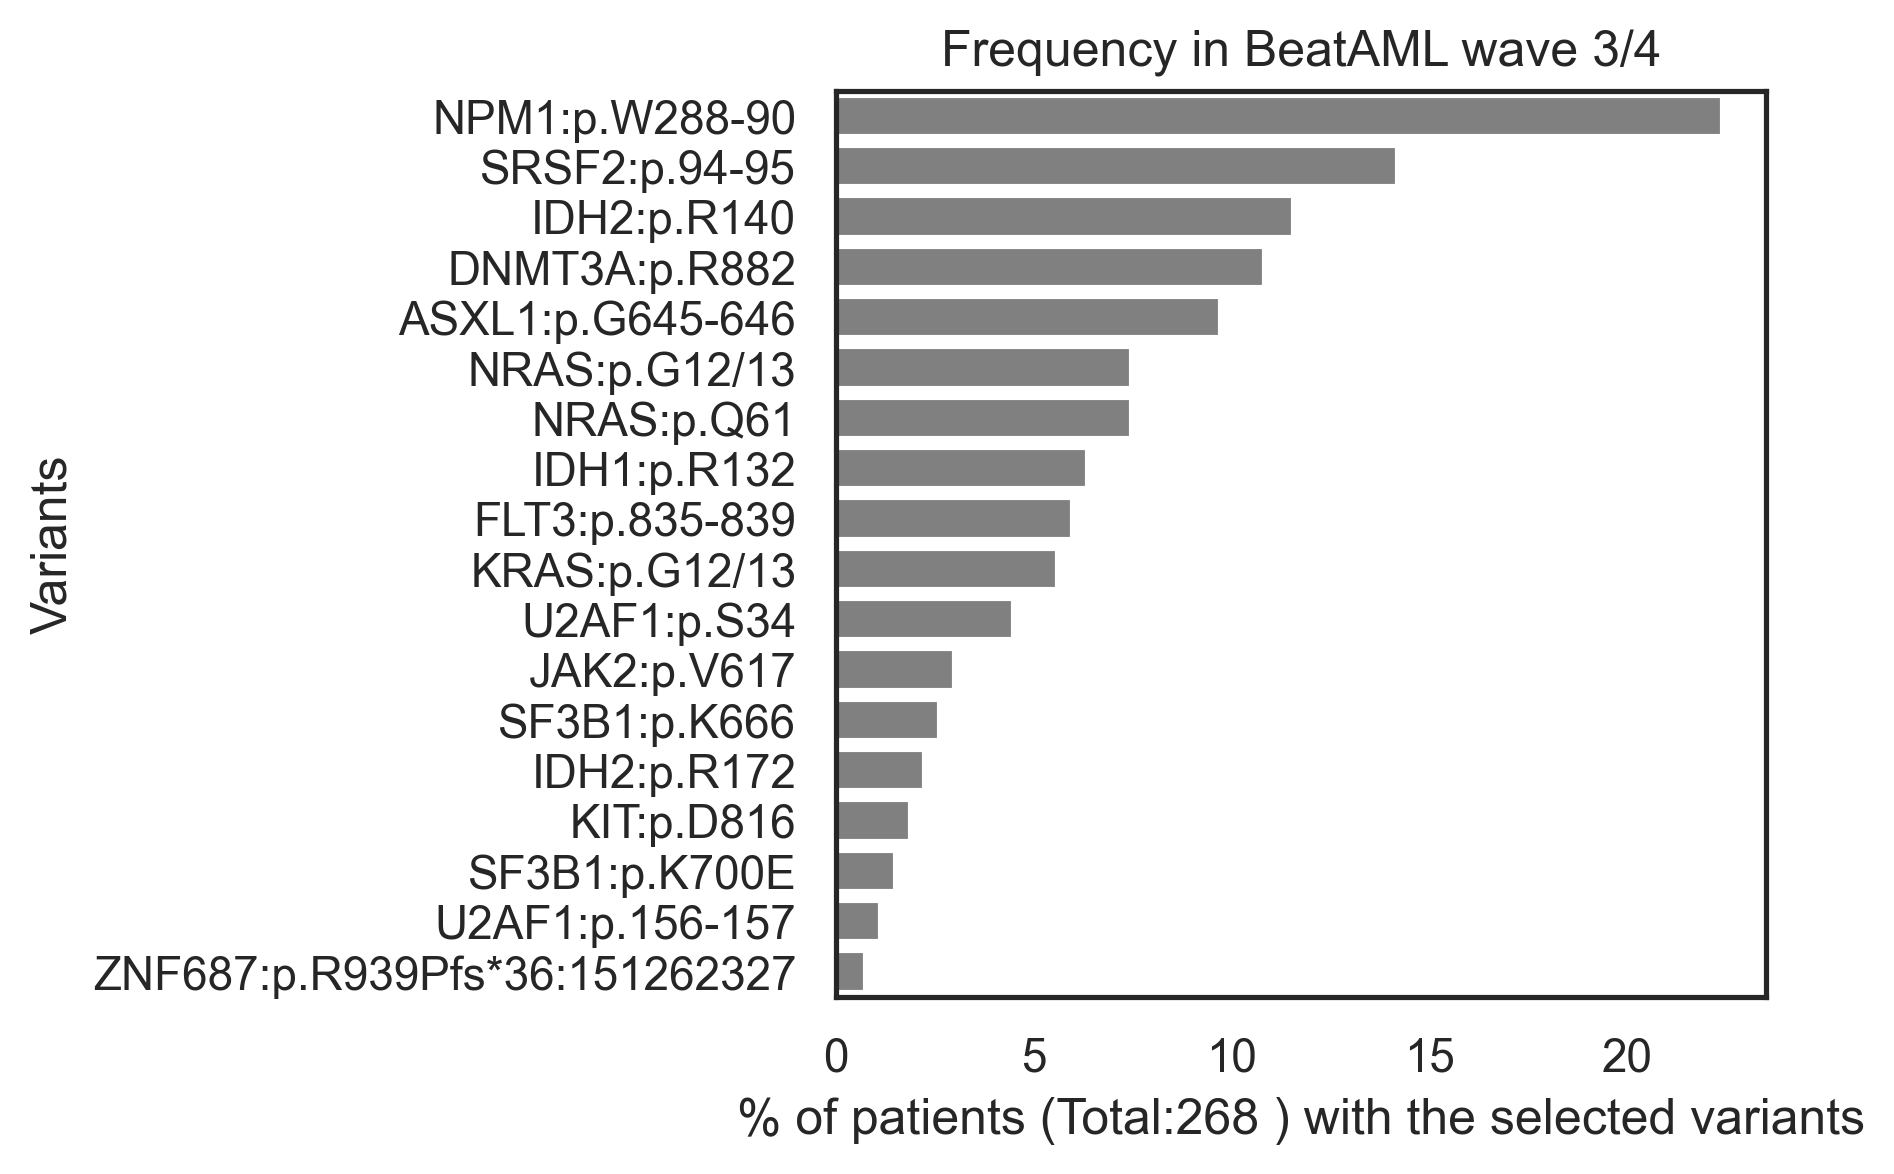

In [27]:
df_select_variants_w34 = df_select_variants1.loc[list(w34),]
print(df_select_variants_w34.shape)
variants = pd.DataFrame()
Genes = []
variants = []
freq = []
for i in selected_variants:
    variants.append(i)
    Genes.append(i.split(":")[0])
    freq.append(df_select_variants_w34.loc[df_select_variants_w34[i] > 0].shape[0]/df_select_variants_w34.shape[0]*100)

variants = pd.DataFrame({"Gene":Genes,"variants":variants,"freq":freq})
variants

# barplot of the frequency of the selected variants ordered by the frequency
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4), dpi=300)
sns.barplot(x = "freq", y = "variants", 
            data = variants.sort_values(by = "freq", ascending = False),
            color="grey")
plt.xlabel("% of patients (Total:" + str(df_select_variants_w34.shape[0])+ " ) with the selected variants")
plt.ylabel("Variants")
plt.title("Frequency in BeatAML wave 3/4")
plt.show()

In [28]:
# outer join  df_select_variants and selected_mutation_matrix
print(df_select_variants1.shape)
print(selected_mutation_matrix.shape)
#selected_merged_matrix = selected_mutation_matrix.join(df_select_variants1)
#selected_merged_matrix = selected_merged_matrix.fillna(0)

selected_merged_matrix = pd.concat([ selected_mutation_matrix, df_select_variants1], axis = 1)
print(selected_merged_matrix.shape)


(268, 18)
(871, 23)
(871, 41)


In [29]:
df_select_variants1.sort_index(axis = 1)

,ASXL1:p.G645-646,DNMT3A:p.R882,FLT3:p.835-839,IDH1:p.R132,IDH2:p.R140,IDH2:p.R172,JAK2:p.V617,KIT:p.D816,KRAS:p.G12/13,NPM1:p.W288-90,NRAS:p.G12/13,NRAS:p.Q61,SF3B1:p.K666,SF3B1:p.K700E,SRSF2:p.94-95,U2AF1:p.156-157,U2AF1:p.S34,ZNF687:p.R939Pfs*36:151262327
13-00150,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
17-00187,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.192982,0.0,0.0,0.0
13-00092,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
17-00551,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.400000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
17-00319,0.108108,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13-00075,0.000000,0.390625,0.743902,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
13-00147,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.277778,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
19-00154,0.000000,0.491453,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.431373,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
17-00748,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [30]:
selected_mutation_matrix_34.sort_index(axis = 1)

,ASXL1,BCOR,CEBPA,DNMT3A,FLT3,GATA2,IDH1,IDH2,KRAS,NF1,...,PDS5B,PTPN11,RUNX1,SF3B1,SRSF2,STAG2,TET2,TP53,U2AF1,WT1
13-00150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17-00187,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
13-00092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17-00551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17-00319,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13-00075,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13-00147,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19-00154,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17-00748,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [32]:
selected_merged_matrix = selected_mutation_matrix.join(df_select_variants1)

In [33]:
selected_merged_matrix = selected_merged_matrix.fillna(0)

In [34]:
selected_merged_matrix.to_csv("../data/Feature_set12_merged_matrix_w1_4.csv")

In [35]:
selected_merged_matrix

,FLT3,KRAS,SRSF2,U2AF1,SF3B1,STAG2,IDH2,JAK2,WT1,PDS5B,...,KRAS:p.G12/13,NPM1:p.W288-90,NRAS:p.G12/13,NRAS:p.Q61,SF3B1:p.K700E,SF3B1:p.K666,SRSF2:p.94-95,U2AF1:p.S34,U2AF1:p.156-157,ZNF687:p.R939Pfs*36:151262327
13-00150,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16-00067,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14-00597,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16-00261,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15-00353,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15-00302,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14-00359,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13-00202,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15-00491,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## RNASeq data processing


In [36]:
BeatAML_rnaseq_w14["RNAseq_geneSymbol"] =BeatAML_rnaseq_w14['stable_id']

In [37]:
BeatAML_rnaseq_matrix = BeatAML_rnaseq_w14.iloc[0:,4:-1]
BeatAML_rnaseq_matrix.index = list(BeatAML_rnaseq_w14.iloc[0:,-1])

print(BeatAML_rnaseq_matrix.shape)

(23150, 707)


In [38]:
# For the RNASeq data, we updated to the features to the genes with expression value (log(RPKM)) greater than 0 in at least 50% 
remain_indexs = []
for index in range(0,BeatAML_rnaseq_matrix.shape[0] ):
    cur_values = BeatAML_rnaseq_matrix.iloc[index,:].values
    if len(cur_values[cur_values>0]) >= BeatAML_rnaseq_matrix.shape[1]/2:
        remain_indexs.append(index)

In [39]:
BeatAML_rnaseq_matrix.iloc[remain_indexs,:].transpose().to_csv("../Data/Feature_set3_RNAseq_matrix_w1_4.csv")

In [42]:
print(selected_merged_matrix.shape)
print(BeatAML_rnaseq_matrix.iloc[remain_indexs,:].transpose().shape)

(871, 41)
(707, 19853)


In [41]:
print(selected_merged_matrix.shape)
feature_matrix = pd.concat([selected_merged_matrix, BeatAML_rnaseq_matrix.iloc[remain_indexs,:].transpose()], axis = 1,join="outer")
print(feature_matrix.shape)
print(feature_matrix.dropna().shape)
feature_matrix.dropna().head(4)

(871, 41)
(963, 19894)
(615, 19894)


,FLT3,KRAS,SRSF2,U2AF1,SF3B1,STAG2,IDH2,JAK2,WT1,PDS5B,...,ENSG00000273448,ENSG00000273449,ENSG00000273456,ENSG00000273464,ENSG00000273466,ENSG00000273472,ENSG00000273477,ENSG00000273483,ENSG00000273486,ENSG00000273488
13-00150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.911782,2.658031,3.490017,0.251223,4.278253,-1.224417,3.168143,0.733848,4.112790,2.643124
16-00067,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.949857,4.160344,3.102009,2.397161,4.038282,3.264091,1.602231,-1.932429,4.791826,2.162298
14-00597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.393040,2.134847,3.251115,2.485959,4.514150,2.531049,-0.238150,1.650952,3.703548,2.974672
15-00353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.615126,1.556277,2.775945,0.130639,3.821515,-0.052933,3.957142,-0.704206,4.587060,3.162867


In [43]:
#feature_matrix_noNA = feature_matrix.dropna()
feature_matrix.to_csv("../Data/Feature_set123_merged_matrix_w1_4.csv")

In [44]:
# Ready to use features

## 1. Feature set 1:
print(selected_mutation_matrix.shape)

## 2. Feature set 2:
print(df_select_variants1.shape)

## 3. Feature set 1 and 2: 
print(selected_merged_matrix.shape)

## 4. Feature set 1, 2, and 3
print(feature_matrix.shape)

#selected_mutation_matrix.to_csv("../Data/Feature_set1_mutation_matrix_w12.csv")
#df_select_variants.to_csv("../Data/Feature_set2_variants_matrix_w12.csv")
#selected_merged_matrix.to_csv( "../Data/Feature_set12_merged_matrix_w12.csv")
#feature_matrix.to_csv("../Data/Feature_set123_merged_matrix_w12.csv")


(871, 23)
(268, 18)
(871, 41)
(963, 19894)


# Generate feature and label matrix for IC50

In [45]:
#BeatAML_drug_response_ic50_matrix = convert_df2matrix_cont(BeatAML_drug_response, 'lab_id', 'inhibitor', 'ic50') 
BeatAML_drug_response_ic50_matrix = mc.convert_df2matrix_cont(BeatAML_drug_response_w14, 'lab_id', 'inhibitor', 'ic50') 
beatAML_data_feature_ic50 = pd.concat([feature_matrix,BeatAML_drug_response_ic50_matrix], axis = 1,join = "outer")
beatAML_data_feature_ic50.to_csv("../data/beatAML_wave14_feature_ic50_highExpr_Mar19_2024_w1_4.csv")

In [46]:
beatAML_data_feature_ic50.loc[:,['DNMT3A:p.R882', 'ASXL1:p.G645-646', 'FLT3:p.835-839', 'IDH1:p.R132',
       'IDH2:p.R140', 'IDH2:p.R172', 'JAK2:p.V617', 'KIT:p.D816',
       'KRAS:p.G12/13', 'NPM1:p.W288-90', 'NRAS:p.G12/13', 'NRAS:p.Q61',
       'SF3B1:p.K700E', 'SF3B1:p.K666', 'SRSF2:p.94-95', 'U2AF1:p.S34',
       'U2AF1:p.156-157', 'ZNF687:p.R939Pfs*36:151262327']].sum(axis = 0)

DNMT3A:p.R882                    13.406682
ASXL1:p.G645-646                  7.396917
FLT3:p.835-839                    5.446509
IDH1:p.R132                       6.813941
IDH2:p.R140                      13.126730
IDH2:p.R172                       2.320944
JAK2:p.V617                       4.107686
KIT:p.D816                        1.846102
KRAS:p.G12/13                     4.529595
NPM1:p.W288-90                   22.123437
NRAS:p.G12/13                     6.526184
NRAS:p.Q61                        6.608028
SF3B1:p.K700E                     1.558358
SF3B1:p.K666                      3.195401
SRSF2:p.94-95                    14.461332
U2AF1:p.S34                       5.406890
U2AF1:p.156-157                   0.900000
ZNF687:p.R939Pfs*36:151262327     0.707502
dtype: float64

# Generate feature and label matrix for AUC

In [47]:
BeatAML_drug_response_auc_matrix = mc.convert_df2matrix_cont(BeatAML_drug_response_w14, 'lab_id', 'inhibitor', 'auc') 
beatAML_data_feature_auc = pd.concat([feature_matrix,BeatAML_drug_response_auc_matrix], axis = 1, join="outer")
beatAML_data_feature_auc.to_csv("../data/beatAML_wave14_feature_auc_highExpr_Mar19_2024_w1_4.csv")